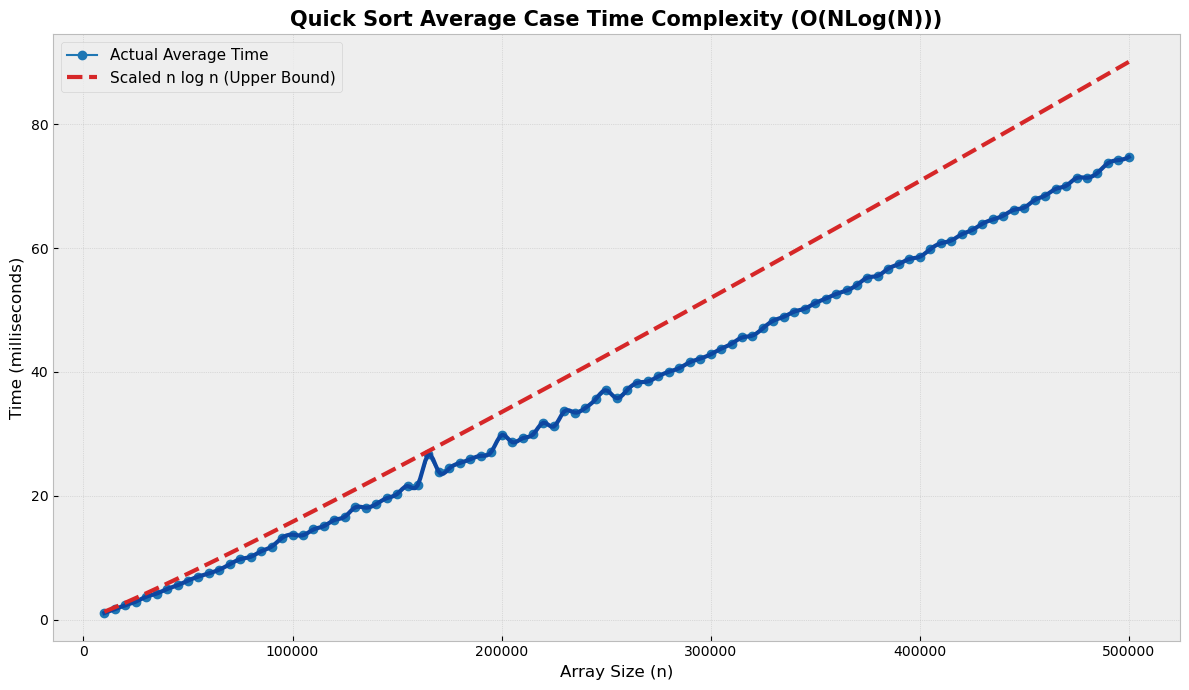

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

def plot_quicksort_avg_case():

    try:
        df = pd.read_csv("quicksort_avg_case.csv")
    except FileNotFoundError:
        print("Error: quicksort_avg_case.csv not found.")
        return

    sizes = df["Size"].values
    actual = df["Avg_Time_ms"].values

    # -------- Theoretical n log n --------
    nlogn = sizes * np.log2(sizes)

    # -------- Least Squares Scaling --------
    scaling_factor = np.sum(actual * nlogn) / np.sum(nlogn**2)
    scaled_nlogn = scaling_factor * nlogn * 1.2

    # -------- Smooth ONLY actual curve --------
    x_smooth = np.linspace(sizes.min(), sizes.max(), 400)
    spline_actual = make_interp_spline(sizes, actual, k=3)
    actual_smooth = spline_actual(x_smooth)

    # -------- Plot --------
    plt.figure(figsize=(12, 7))
    plt.style.use("bmh")
    plt.grid(True, linestyle=":", alpha=0.7)

    # Actual data points
    plt.plot(sizes, actual,
             marker="o",
             linewidth=1.5,
             color="#1f77b4",
             label="Actual Average Time")

    # Smoothed actual curve
    plt.plot(x_smooth, actual_smooth,
             linewidth=3,
             color="#0d47a1")

    # Proper n log n upper bound
    plt.plot(sizes, scaled_nlogn,
             linestyle="--",
             linewidth=3,
             color="#d62728",
             label="Scaled n log n (Upper Bound)")

    plt.title("Quick Sort Average Case Time Complexity (O(NLog(N)))",
              fontsize=15, fontweight="bold")

    plt.xlabel("Array Size (n)", fontsize=12)
    plt.ylabel("Time (milliseconds)", fontsize=12)

    plt.legend(fontsize=11)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_quicksort_avg_case()
